<a href="https://colab.research.google.com/github/adalbertii/modele-NLP/blob/main/CNN_sentiment_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/dane/sentiment'

filepath_dict = {'yelp': '/content/drive/MyDrive/dane/sentiment/yelp_labelled.txt',
                 'amazon': '/content/drive/MyDrive/dane/sentiment/amazon_cells_labelled.txt',
                 'imdb': '/content/drive/MyDrive/dane/sentiment/imdb_labelled.txt'}


In [ ]:

df_list = []
for source, filepath in filepath_dict.items():
   df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
   # Dodaj kolejną kolumnę wypełnioną nazwą źródła
   df['source'] = source
   df_list.append(df)
   df = pd.concat(df_list)



In [ ]:
print(df.head())

                                            sentence  label source
0                           Wow... Loved this place.      1   yelp
1                                 Crust is not good.      0   yelp
2          Not tasty and the texture was just nasty.      0   yelp
3  Stopped by during the late May bank holiday of...      1   yelp
4  The selection on the menu was great and so wer...      1   yelp


In [ ]:
df.shape

(2748, 3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
df_yelp = df[df['source'] == 'yelp']

sentences = df_yelp['sentence'].values
y = df_yelp['label'].values



In [ ]:
sentences[:5]

array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.',
       'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
       'The selection on the menu was great and so were the prices.'],
      dtype=object)

In [ ]:
y[:5]

array([1, 0, 0, 1, 1])

In [ ]:
sentences_train,sentences_test,y_train,y_test = train_test_split(sentences, y,
                                                                 test_size=0.25,
                                                                random_state=1000)

In [ ]:
sentences_train[:5]

array(['The food was barely lukewarm, so it must have been sitting waiting for the server to bring it out to us.',
       'Sorry, I will not be getting food from here anytime soon :(',
       'Of all the dishes, the salmon was the best, but all were great.',
       'The fries were not hot, and neither was my burger.',
       "In fact I'm going to round up to 4 stars, just because she was so awesome."],
      dtype=object)

In [ ]:
sentences_train.shape

(750,)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

In [ ]:
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)


In [ ]:
X_train[:5]

[[1,
  10,
  3,
  282,
  739,
  25,
  8,
  208,
  30,
  64,
  459,
  230,
  13,
  1,
  124,
  5,
  231,
  8,
  58,
  5,
  67],
 [740, 4, 46, 12, 20, 160, 10, 72, 35, 355, 232],
 [11, 43, 1, 171, 1, 283, 3, 1, 47, 26, 43, 24, 22],
 [1, 233, 24, 12, 209, 2, 741, 3, 23, 125],
 [14, 356, 83, 126, 5, 742, 59, 5, 357, 96, 41, 127, 234, 3, 25, 161]]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1 # Dodanie 1 z powodu zarezerwowanego indeksu 0
vocab_size


1747

In [ ]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
X_train[:5]

array([[  1,  10,   3, 282, 739,  25,   8, 208,  30,  64, 459, 230,  13,
          1, 124,   5, 231,   8,  58,   5,  67,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [740,   4,  46,  12,  20, 160,  10,  72,  35, 355, 232,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
sentences_test[1]

"If you are reading this please don't go there."

In [ ]:
y_test[1]

0

**Symulacja procesu EMBEDDING**

In [ ]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    # Ponowne dodanie 1 z powodu zarezerwowanego indeksu 0
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [ ]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('/content/drive/MyDrive/dane/sentiment/glove.6B.50d.txt',
                                            tokenizer.word_index,
                                            embedding_dim)


In [ ]:
embedding_matrix.shape

(1747, 50)

In [ ]:
embedding_matrix[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 4.18

**Budowa modelu**

Warstwa Embedding() zastępuje działania symulowane powyżej

In [ ]:
from keras.models import Sequential
from keras import layers


In [ ]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          174700    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 240129 (938.00 KB)
Trainable params: 240129 (938.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Epoch 1/10
75/75 [==============================] - 7s 66ms/step - loss: 0.6805 - accuracy: 0.5733 - val_loss: 0.6571 - val_accuracy: 0.6640
Epoch 2/10
75/75 [==============================] - 3s 40ms/step - loss: 0.4822 - accuracy: 0.8547 - val_loss: 0.4995 - val_accuracy: 0.7840
Epoch 3/10
75/75 [==============================] - 4s 49ms/step - loss: 0.1650 - accuracy: 0.9627 - val_loss: 0.4701 - val_accuracy: 0.7960
Epoch 4/10
75/75 [==============================] - 4s 41ms/step - loss: 0.0405 - accuracy: 0.9933 - val_loss: 0.5195 - val_accuracy: 0.7920
Epoch 5/10
75/75 [==============================] - 2s 28ms/step - loss: 0.0108 - accuracy: 0.9987 - val_loss: 0.5693 - val_accuracy: 0.7720
Epoch 6/10
75/75 [==============================] - 4s 50ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.5904 - val_accuracy: 0.7760
Epoch 7/10
75/75 [==============================] - 5s 67ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6385 - val_accuracy: 0.7760
Epoch 8/10
75

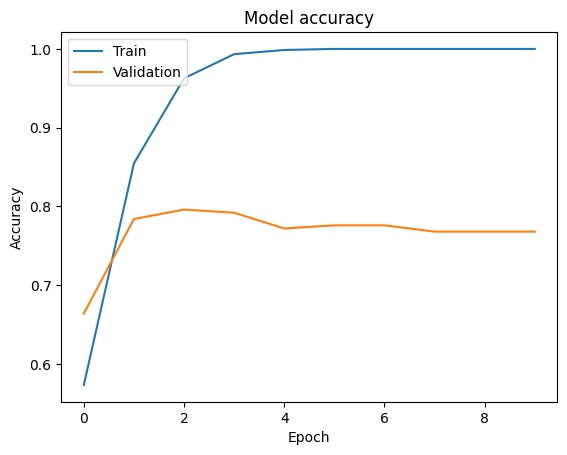

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# predykcja dla całego zbioru testowego
Y_pred = model.predict(X_test)

8/8 [==============================] - 1s 33ms/step


In [ ]:
print(Y_pred[:15],y_test[:15])

[[5.6103738e-03]
 [1.2457233e-03]
 [9.6530383e-03]
 [5.0268762e-02]
 [5.6872123e-01]
 [6.7895126e-01]
 [4.9583009e-03]
 [9.9977136e-01]
 [1.0570609e-02]
 [9.9946308e-01]
 [1.5064624e-04]
 [3.6588019e-01]
 [7.2595978e-01]
 [3.6783438e-02]
 [9.2840910e-01]] [0 0 0 0 0 1 0 1 0 1 0 0 0 0 1]


In [ ]:
yy=Y_pred.round()

In [ ]:
yy[:15]

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
# Raport klasyfikacji
from sklearn.metrics import classification_report
print(classification_report(y_test, yy))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       120
           1       0.81      0.73      0.77       130

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250

